# CS 109a Final Project - Modeling and Interpretation
## Group 50

## 0. Import libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')

## 1. Data Processing

### Load data

In [9]:
# Load data
data = pd.read_csv("data_model.csv", index_col=0)
data.head()

,RID,AGE,PTGENDER,PTEDUCAT,PTMARRY,HCAMPLAS,BMI,MH16SMOK,RAVLT_immediate,RAVLT_learning,...,AVLT_Delay_Rec,ADAS13,TMT_PtB_Complete,CATANIMSC,FAQ,FDG,ABETA,TAU,APOE4,MCI_reversion_2y
Phase,,,,,,,,,,,,,,,,,,,,,
ADNI1,6,80.4,Female,13,Married,9.7,24.324697,0,30,1,...,7.0,25.67,168.0,13,0.0,NaN,NaN,NaN,0,0
ADNI1,33,83.3,Male,20,Married,7.1,12.511363,1,21,4,...,NaN,25.67,NaN,16,6.0,1.10567,129.0,110.0,0,0
ADNI1,51,66.5,Male,18,Married,8.8,23.849469,0,29,1,...,10.0,17.67,94.0,9,2.0,1.36977,92.5,83.1,2,0
ADNI1,80,85.0,Male,18,Married,10.8,23.242022,0,23,4,...,11.0,21.00,81.0,17,1.0,1.21013,NaN,NaN,1,0
ADNI1,98,84.4,Female,16,Unmarried,12.2,24.248285,1,25,4,...,15.0,17.67,167.0,17,4.0,NaN,NaN,NaN,1,0


In [10]:
data.columns.get_values()

array(['RID', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY', 'HCAMPLAS', 'BMI',
       'MH16SMOK', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_perc_forgetting', 'AVLT_Delay_Rec', 'ADAS13',
       'TMT_PtB_Complete', 'CATANIMSC', 'FAQ', 'FDG', 'ABETA', 'TAU',
       'APOE4', 'MCI_reversion_2y'], dtype=object)

** Before we start fitting classification models, we notice that there are some values in the three biomarkers columns are missing.**

In [11]:
# Number of observations with missing data
print('Number of observations with missing predictors is', len(data)-len(data.dropna()))

Number of observations with missing predictors is 355


In [12]:
# Check missing samples for each predictors
data.isnull().sum()

RID                        0
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
PTMARRY                    0
HCAMPLAS                 214
BMI                        0
MH16SMOK                   0
RAVLT_immediate            0
RAVLT_learning             0
RAVLT_perc_forgetting      0
AVLT_Delay_Rec           227
ADAS13                     2
TMT_PtB_Complete         227
CATANIMSC                  0
FAQ                        4
FDG                       79
ABETA                    104
TAU                      108
APOE4                      0
MCI_reversion_2y           0
dtype: int64

In [13]:
# Drop predictors with missing value
data = data.drop(['HCAMPLAS','AVLT_Delay_Rec','ABETA','TMT_PtB_Complete','FDG','TAU','RID','PTEDUCAT','BMI','RAVLT_learning','RAVLT_perc_forgetting','FAQ'],1)
data = data[np.isfinite(data['ADAS13'])]
data

,AGE,PTGENDER,PTMARRY,MH16SMOK,RAVLT_immediate,ADAS13,CATANIMSC,APOE4,MCI_reversion_2y
Phase,,,,,,,,,
ADNI1,80.4,Female,Married,0,30,25.67,13,0,0
ADNI1,83.3,Male,Married,1,21,25.67,16,0,0
ADNI1,66.5,Male,Married,0,29,17.67,9,2,0
ADNI1,85.0,Male,Married,0,23,21.00,17,1,0
ADNI1,84.4,Female,Unmarried,1,25,17.67,17,1,0
ADNI1,70.3,Female,Married,1,22,24.67,5,1,0
ADNI1,60.7,Female,Married,0,50,3.00,17,0,0
ADNI1,70.6,Male,Married,0,50,9.00,19,1,1
ADNI1,78.4,Male,Married,1,30,15.33,16,0,0


** Missing problem**
<br/>If we use predictors with missing values, our model will drop samples with missing predictors, which lead to dramatically decreased sample size. In order to keep enough sample size, we will drop these predictors with missing value.

### Data processing

- ** Data was split into 75% training set and 25% test set. **
- ** All continous variable were normalizaed:**
<br/> The majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. We notice that the range of values of raw data varies widely, these continuous features should be normalized so that each feature contributes approximately proportionately to the final distance.
- ** Interpretations for all predictors ???**

In [43]:
# Divide data into training and test set
np.random.seed(9001)
msk = np.random.rand(len(data)) < 0.75
data_train = data[msk]
data_test = data[~msk]

X_train = data_train.drop('MCI_reversion_2y',1)
y_train = data_train['MCI_reversion_2y'].values
X_test = data_test.drop('MCI_reversion_2y',1)
y_test = data_test['MCI_reversion_2y'].values

# Pre-process the categorical attributes - create dummy variables
attr_cats = ['PTGENDER', 'PTMARRY', 'APOE4','MH16SMOK']
x_train = pd.get_dummies(X_train, columns=attr_cats, drop_first=True)
x_test = pd.get_dummies(X_test, columns=attr_cats, drop_first=True)

# Pre-process the numerical attributes - standardize the variables
attr_nums = ['AGE','RAVLT_immediate', 'ADAS13', 'CATANIMSC']

means = {attr_num: np.mean(x_train[attr_num]) for attr_num in attr_nums}
sds = {attr_num: np.std(x_train[attr_num], ddof=1) for attr_num in attr_nums}

for attr_num in attr_nums:
    x_train[attr_num] = (x_train[attr_num] - means[attr_num]) / sds[attr_num]
    x_test[attr_num] = (x_test[attr_num] - means[attr_num]) / sds[attr_num]

In [37]:
print('Number of cases in the training set is', np.sum(y_train))

Number of cases in the training set is 24


**This is a dataset with imbalanced class labels**
<br/> There are many more patiants that didn't reverse ( Y=0 ) than reversion subjects ( Y=1 ). We would think the classification accuracy may not be the best metric to evaluate a classifier's performance. As an alternative, we could analyze the confusion table for the classifier.

### PCA analysis

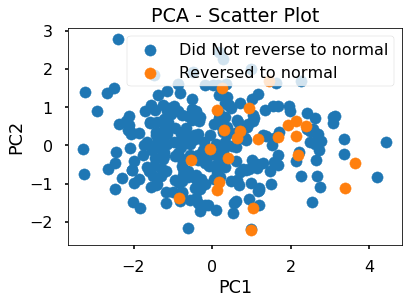

In [38]:
# Find the top two principal components for the gene expression data
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Create a dataset for the top two principle components
train_pca = pd.DataFrame({'MCI reversion': y_train})
train_pca['pc1'] = x_train_pca[:,0]
train_pca['pc2'] = x_train_pca[:,1]

# Generate a scatter plot
plt.scatter(train_pca[train_pca['MCI reversion']==0]['pc1'], train_pca[train_pca['MCI reversion']==0]['pc2'], label='Did Not reverse to normal')
plt.scatter(train_pca[train_pca['MCI reversion']==1]['pc1'], train_pca[train_pca['MCI reversion']==1]['pc2'], label='Reversed to normal ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Scatter Plot')
plt.legend();

Each dot in this plot represents one sample. If we look at the green dots, the patients who reverse to normal have generally high value for the first principal component compared to blue dots, which represent patients did not reverse to normal. 

## 2. Classification Models

In [39]:
# Functions to calculate TPR and FPR
def tpr(confusion_matrix):
    return confusion_matrix[1][1]/np.sum(confusion_matrix[1])
def fpr(confusion_matrix):
    return confusion_matrix[0][1]/np.sum(confusion_matrix[0])

### a. Logistic Regression
We use L2 regularization in logistic regression, with the regularization parameter tuned using 5 fold cross-validation.

In [46]:
# Logistic Regression 
logistic = LogisticRegressionCV(cv=5, penalty='l2').fit(x_train, y_train)
logistic_acc_train = logistic.score(x_train, y_train)
logistic_acc_test = logistic.score(x_test, y_test)
cm_log = metrics.confusion_matrix(y_train, logistic.predict(x_train))
auc_log = metrics.roc_auc_score(y_train, logistic.predict_proba(x_train)[:,1])
auc_log_test = metrics.roc_auc_score(y_test, logistic.predict_proba(x_test)[:,1])

### b. Linear Discriminant Analysis

In [47]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
lda_acc_train = lda.score(x_train, y_train)
lda_acc_test = lda.score(x_test, y_test)
cm_lda = metrics.confusion_matrix(y_train, lda.predict(x_train))
auc_lda = metrics.roc_auc_score(y_train, lda.predict_proba(x_train)[:,1])
auc_lda_test= metrics.roc_auc_score(y_test, lda.predict_proba(x_test)[:,1])

### c. k-NN
We fit a k-NN regression model to the training set for different values of  k (1 to 20) and choose k using 5 fold cross-validation.

In [48]:
# k-NN
neighbors = np.arange(1,20)

# Perform 5-fold cross validation to choose the optimal number of neighbors
cv_scores_knn = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores_knn.append(scores.mean())

# Determine the best k
optimal_k = neighbors[np.argmax(cv_scores_knn)]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 6


In [49]:
# Fit k-NN model using the optimal number of neighbors
knn = KNeighborsClassifier(optimal_k).fit(x_train, y_train)
knn_acc_train = knn.score(x_train, y_train)
knn_acc_test = knn.score(x_test, y_test)
cm_knn = metrics.confusion_matrix(y_train, knn.predict(x_train))
auc_knn= metrics.roc_auc_score(y_train, knn.predict_proba(x_train)[:,1])
auc_knn_test = metrics.roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

### d. Decision Tree
We fit a decision tree model to the training set and use 5-fold cross-validation to choose the (maximum) depth for the tree.

In [50]:
# Decision tree
depths = np.arange(2,25)

# Use 5-fold cross-validation to choose the (maximum) depth for the tree
cv_scores_dt = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores_dt.append(scores.mean())

# Determine the best (maximum) depth
best_depth = depths[np.argmax(cv_scores_dt)]
print('The best maximum depth is %d'%(best_depth))

The best maximum depth is 2


In [51]:
# Fit decision tree model using the best (maximum) depth
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(x_train, y_train)
dt_acc_train = dt.score(x_train, y_train)
dt_acc_test = dt.score(x_test, y_test)
cm_dt = metrics.confusion_matrix(y_train, dt.predict(x_train))
auc_dt = metrics.roc_auc_score(y_train, dt.predict_proba(x_train)[:,1])
auc_dt_test = metrics.roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])

### e. Random Forest
We fit a random forest model to the training set and use 5-fold cross-validation to choose the optimal value for the number of predictors and trees.

In [52]:
# Use 5-fold cross-validation to choose the optimal value for the number of predictors
n_features = np.arange(1,8)
n_trees = 2**np.arange(1,9)

cv_scores_rf = {}
for n_feature in n_features:
    for n_tree in n_trees:
        rf = RandomForestClassifier(n_estimators=n_tree, max_features=n_feature, max_depth=best_depth)
        scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
        cv_scores_rf[(n_feature,n_tree)] = scores.mean()
        
best_n_feature, best_n_tree = max(cv_scores_rf, key=cv_scores_rf.get)
print('The optimal value for the number of predictors is %d\nThe optimal value for the number of trees is %d'%(best_n_feature,best_n_tree))

The optimal value for the number of predictors is 1
The optimal value for the number of trees is 2


In [53]:
# Fit the RF model using the optimal number of trees and the optimal number of predictors
rf = RandomForestClassifier(n_estimators=best_n_tree, max_features=best_n_feature, max_depth=best_depth)
rf.fit(x_train, y_train)
rf_acc_train = rf.score(x_train, y_train)
rf_acc_test = rf.score(x_test, y_test)
cm_rf = metrics.confusion_matrix(y_train, rf.predict(x_train))
auc_rf= metrics.roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
auc_rf_test= metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])

In [54]:
rf.feature_importances_
names = x_train.columns.get_values()

In [55]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.45419999999999999, 'RAVLT_immediate'), (0.33800000000000002, 'CATANIMSC'), (0.20780000000000001, 'MH16SMOK_1'), (0.0, 'PTMARRY_Unmarried'), (0.0, 'PTGENDER_Male'), (0.0, 'APOE4_2'), (0.0, 'APOE4_1'), (0.0, 'AGE'), (0.0, 'ADAS13')]


### f. Boosting
We fit a Boosting model to the training set and apply 5-fold cross-validation to choose the optimal number of trees for the ensemble and the optimal tree depth for the base learners.

In [56]:
# Boosting
n_tree = 2**np.arange(1,5)
depths = [1,2,10,None]

cv_scores_bo = {}
for depth in depths:
    for n in n_tree:
        adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), n_estimators=n, learning_rate=0.05)
        scores = cross_val_score(adaboost, x_train, y_train, cv=5, scoring='accuracy')
        cv_scores_bo[(depth,n)] = scores.mean()
best_depth, best_n_tree = max(cv_scores_bo, key=cv_scores_bo.get)
print('The optimal maximum depth is %d\nThe optimal number of trees is %d'%(best_depth, best_n_tree))

The optimal maximum depth is 1
The optimal number of trees is 2


In [57]:
# Fit the AdaBoost model using the optimal number of trees and the optimal maximum depth
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_depth), n_estimators=best_n_tree, learning_rate=0.05)
adaboost.fit(x_train, y_train)
adaboost_acc_train = adaboost.score(x_train, y_train)
adaboost_acc_test = adaboost.score(x_test, y_test)
cm_adaboost = metrics.confusion_matrix(y_train, adaboost.predict(x_train))
auc_adaboost= metrics.roc_auc_score(y_train, adaboost.predict_proba(x_train)[:,1])
auc_adaboost_test= metrics.roc_auc_score(y_test, adaboost.predict_proba(x_test)[:,1])

### Model Performance

In [34]:
model = ['Logistic regression','LDA','k-NN','Decision Tree','Random Forest','Adaboost']
column = ['Training accuracy','Test accuracy','True postive rate','False postive rate','AUC_training','AUC_test']

models = pd.DataFrame(index=model, columns=column)
models['Training accuracy']=[logistic_acc_train, lda_acc_train,knn_acc_train,dt_acc_train,rf_acc_train,adaboost_acc_train]
models['Test accuracy']=[logistic_acc_test, lda_acc_test,knn_acc_test,dt_acc_test,rf_acc_test,adaboost_acc_test]
models['True postive rate']=[tpr(cm_log), tpr(cm_lda),tpr(cm_knn),tpr(cm_dt),tpr(cm_rf),tpr(cm_adaboost)]
models['False postive rate']=[fpr(cm_log), fpr(cm_lda),fpr(cm_knn),fpr(cm_dt),fpr(cm_rf),fpr(cm_adaboost)]
models['AUC_training']=[auc_log, auc_lda,auc_knn,auc_dt,auc_rf,auc_adaboost]
models['AUC_test']=[auc_log_test, auc_lda_test,auc_knn_test,auc_dt_test,auc_rf_test,auc_adaboost_test]
models

,Training accuracy,Test accuracy,True postive rate,False postive rate,AUC_training,AUC_test
Logistic regression,0.915789,0.955752,0.0,0.0,0.762771,0.866667
LDA,0.915789,0.964602,0.0,0.0,0.772989,0.851852
k-NN,0.915789,0.955752,0.0,0.0,0.886574,0.637963
Decision Tree,0.915789,0.955752,0.0,0.0,0.775064,0.713889
Random Forest,0.915789,0.955752,0.0,0.0,0.795498,0.615741
Adaboost,0.915789,0.955752,0.0,0.0,0.645115,0.707407


- Not surprisingly, the differences of accuracies are too small for us to select the best classifier. There are many more patiants that didn't reverse ( Y=0 ) than patients who reverse to normal ( Y=1 ) , so the classification accuracy would not differ too much if we all classifer them as non-reversed subjects.
- If we use the true postive rate to evaluate a classifier's performance, adaboosting is apparently better than other models; The false postive rate is low for all models; If we use AUC as criterion , logistic regression and adaboosting have better performance.
- 

### ROC curve for adaboost

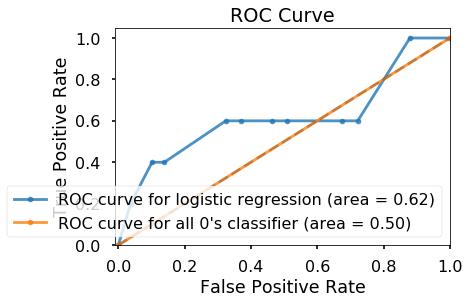

In [35]:
# Display the ROC curve for both the fitted classifier and the all 0's classifier on the test set. 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, rf.predict_proba(x_test)[:,1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, np.zeros(len(y_test)))
auc1 = metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
auc2 = metrics.roc_auc_score(y_test, np.zeros(len(y_test)))
plt.plot(fpr1, tpr1, '.-', alpha=0.8, label='ROC curve for logistic regression (area = %0.2f)' % (auc1))
plt.plot(fpr2, tpr2, '.-', alpha=0.8, label='ROC curve for all 0\'s classifier (area = %0.2f)' % (auc2))
plt.plot([0, 1], [0, 1], 'k--', alpha=0.2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

##### Interpretation
Not surprising, the difference is too small for us to declare logistic regression as a better classifier. Because there are many more healthy subjects ( Y=0
 ) than those with cancer ( Y=1
 ), so the classification accuracy would not differ too much if we all classifer them as healthy subjects. Thus classification accuracy may not be the best metric to evaluate a classifier's performance. However, the false negative rate must be higher for the all 0's classifier compare to logistic regression,

# Other Models???????????
# Thoughts?